In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [61]:
#Hout[k_, s_, p_, Hin_] := Floor[((Hin + 2 * p - (k - 1) - 1) / s) + 1]
    
def Hout(k,s,p,Hin):
    Hout = np.floor(((Hin + 2*p - (k-1) -1)/s) + 1 )
    return Hout


#Hout=(Hin−1)∗stride[0]−2∗padding[0]+kernel_size[0]+output_padding[0]

def HoutT(k,s,p,Hin):
    HoutT =np.floor((Hin -1)*s - 2.*p + k)
    return HoutT


def convolution_info(k,s,p, dim = 32, ignore_remainder = True):
    Hin = dim
    Hout = np.floor(((Hin + 2*p - (k-1) -1)/s) + 1 )
    x_list = []
    y_list = []
    
    if (dim + 2*p - k) % s == 0:
        ignore_remainder = True
    
    for i in range((dim + 2*p)/s ):
        for j in range((dim + 2*p)/s ):
            sx = i*s
            sy = j*s
            #print sx
            if ((sx+k) > (dim + 2*p)):
                if ignore_remainder == True or (s ==1):
                    break
                #print sx
                new_lim = (sx + k) - (dim + 2*p)
                for x in range(sx, sx + new_lim):
                    for y in range(sy, sy + k ):
                        x_list.append(int(x))
                        y_list.append(int(y))
                    
            elif ((sy + k) > (dim + 2*p)):
                if ignore_remainder == True or (s == 1):
                    break
                new_lim = (sy + k ) - (dim + 2*p)
                for x in range(sx, sx + k):
                    for y in range(sy, sy + new_lim ):
                        x_list.append(int(x))
                        y_list.append(int(y))    
            else:
                for x in range (sx, sx+k):
                    for y in range(sy,sy+k):
                        x_list.append(int(x))
                        y_list.append(int(y))
    
    xedges, yedges = np.linspace(0, dim + 2*p, dim + 2*p + 1), np.linspace(0,dim + 2*p ,dim + 2*p + 1)
    hist, xedges,yedges = np.histogram2d(x_list,y_list, bins = (xedges,yedges))
    im = plt.imshow(hist, vmin=0)
    plt.colorbar()
    plt.show()
    print "Output height and width:", Hout
    return int(Hout)
                    
    # for(i=0;i<15;++i) {for (j=0;j<15;++j) {  sx=i*2 ; sy=j*2;   for(x=sx; x<sx+5; ++x) {  for(y=sy;y<sy+5;++y){   print x,y}   }   }}  }

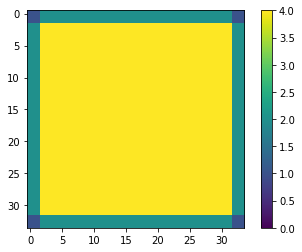

Output height and width: 16.0


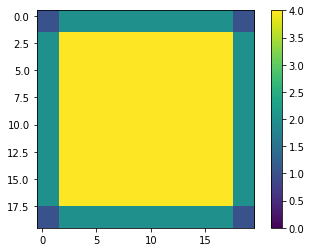

Output height and width: 9.0


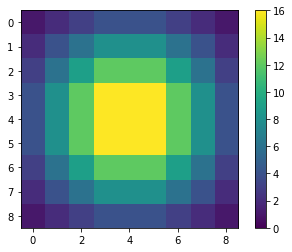

Output height and width: 6.0


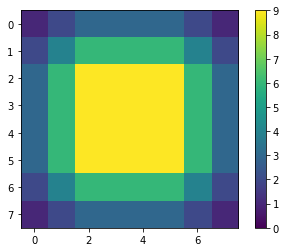

Output height and width: 6.0


In [62]:
Hout1 = convolution_info(4,2,1,dim=32, ignore_remainder=False)
Hout2 = convolution_info(4,2,2,dim=Hout1, ignore_remainder=False)
Hout3 = convolution_info(4,1,0,dim=Hout2, ignore_remainder=False)
Hout4 = convolution_info(3,1,1,dim=Hout3, ignore_remainder=False)
#Hout5 = convolution_info(4,1,0,dim=Hout4, ignore_remainder=True)

In [63]:
H1 = HoutT(4,2,0,2)
print H1
H2 = HoutT(4,2,0,H1)
print H2
H3 = HoutT(4,2,0,H2)
print H3
H4 = HoutT(3,1,0,H3)
print H4

6.0
14.0
30.0
32.0


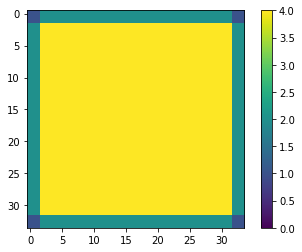

Output height and width: 16.0


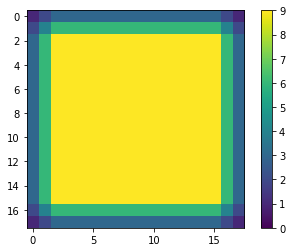

Output height and width: 16.0


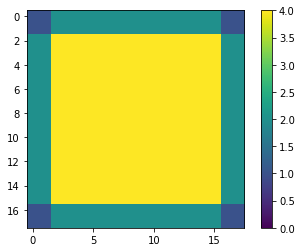

Output height and width: 8.0


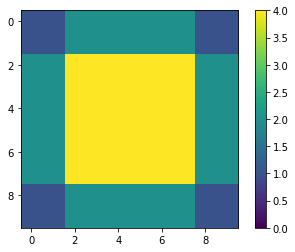

Output height and width: 4.0


In [64]:
Hout1 = convolution_info(4,2,1,dim=32, ignore_remainder=False)
Hout2 = convolution_info(3,1,1,dim=Hout1, ignore_remainder=False)
Hout3 = convolution_info(4,2,1,dim=Hout2, ignore_remainder=False)
Hout4 = convolution_info(4,2,1,dim=Hout3, ignore_remainder=False)

In [83]:
H1 = HoutT(6,2,0,1)
print H1
H2 = HoutT(4,2,0,H1)
print H2
H3 = HoutT(4,1,0,H2)
print H3
H4 = HoutT(4,1,0,H3)
print H4

6.0
14.0
17.0
20.0
